# Análisis de la Inflación en Argentina: Tendencias y Volatilidad (2017-2024)

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "Inflacion.xlsx"
data = pd.read_excel(file_path)

data.columns = ["Inflacion (%)", "Fecha"]

# Convierto la columna de fechas al formato datetime
data["Fecha"] = pd.to_datetime(data["Fecha"], format='%b-%y')

# Muestro los primeros datos para verificar
print(data.head())

   Inflacion (%)      Fecha
0            1.6 2017-01-01
1            2.1 2017-02-01
2            2.4 2017-03-01
3            2.7 2017-04-01
4            1.4 2017-05-01


In [31]:
print(data["Inflacion (%)"].describe())

count    94.000000
mean      4.734043
std       3.796704
min       1.200000
25%       2.625000
50%       3.700000
75%       5.775000
max      25.500000
Name: Inflacion (%), dtype: float64


# Gráfico de la inflación mensual a lo largo del tiempo:

El gráfico que se presenta a continuación muestra la evolución de la inflación mensual en Argentina 
durante el periodo de tiempo analizado, lo cual permite observar las fluctuaciones y tendencias de 
la inflación en el transcurso de los meses. Es una visualización útil para entender cómo los 
distintos factores macroeconómicos afectan la inflación a corto plazo.

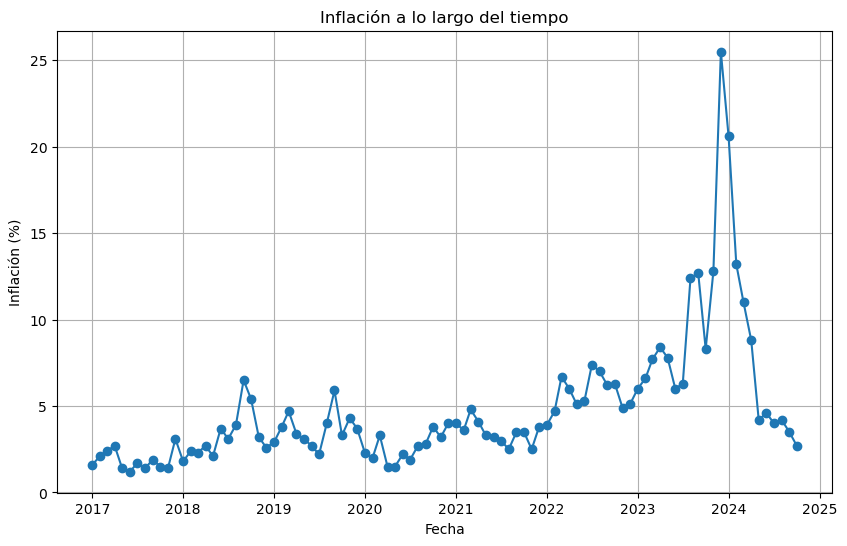

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(data["Fecha"], data["Inflacion (%)"], marker='o', linestyle='-')
plt.title("Inflación a lo largo del tiempo")
plt.xlabel("Fecha")
plt.ylabel("Inflación (%)")
plt.grid(True)
plt.show()

# **Mes con mayor inflación**: 

Este mes es importante para identificar picos inflacionarios, 
que podrían estar vinculados a crisis económicas o factores externos.

In [33]:
# Fecha de la mayor inflación mensual

max_row = data.loc[data["Inflacion (%)"].idxmax()]
print(f"Mes con mayor inflación: {max_row['Fecha']}, con {max_row['Inflacion (%)']}%")

Mes con mayor inflación: 2023-12-01 00:00:00, con 25.5%


# **Mes con menor inflación**: 

Este mes es relevante ya que puede reflejar un periodo 
de estabilización o mejoras en la política económica.

In [34]:
# Fecha de la menor inflacion mensual

min_row = data.loc[data["Inflacion (%)"].idxmin()]
print(f"Mes con menor inflación: {min_row['Fecha']}, con {min_row['Inflacion (%)']}%")

Mes con menor inflación: 2017-06-01 00:00:00, con 1.2%


# Proyección de inflación utilizando la media y la mediana:

La media de inflación es un valor que representa el promedio de los datos históricos, 
y puede ser sensible a los valores extremos (outliers). Esto significa que si hay picos 
de inflación muy altos o bajos, la media puede verse distorsionada por estos valores extremos.

La mediana, por otro lado, es el valor que se encuentra en el centro de los datos ordenados 
y es menos afectada por los valores atípicos o outliers. Esto hace que la mediana sea una 
medida más robusta de tendencia central cuando existen fluctuaciones extremas en los datos.

Por lo tanto, la media es útil para estimaciones generales, mientras que la mediana es preferible 
cuando se desea una representación más precisa de la tendencia de inflación en presencia de valores extremos.

In [35]:
# Calculamos la tasa promedio mensual de inflación
promedio_mensual = data["Inflacion (%)"].mean()

# Proyectamos la inflación acumulada para 2025
inflacion_2025 = (1 + promedio_mensual / 100) ** 12 - 1

print(f"La inflación estimada para 2025, basada en el promedio mensual de los últimos 7 años, es de {inflacion_2025 * 100:.2f}%.")

La inflación estimada para 2025, basada en el promedio mensual de los últimos 7 años, es de 74.20%.


In [36]:
# Calculo la mediana de las tasas mensuales
mediana_mensual = data["Inflacion (%)"].median()

# Proyección usando la mediana

inflacion_mediana_2025 = (1 + mediana_mensual / 100) ** 12 - 1

print(f"La inflación estimada para 2025 usando la mediana mensual de los últimos 7 años es de {inflacion_mediana_2025 * 100:.2f}%.")

La inflación estimada para 2025 usando la mediana mensual de los últimos 7 años es de 54.65%.


# Proyección de inflación utilizando la mediana ajustada con un factor de reducción:

La inflación mediana proyectada es un valor central que representa la tendencia más robusta 
en los datos históricos, menos afectada por los valores extremos. Para este escenario, se asume 
que, debido a mejoras en la economía argentina como el equilibrio fiscal, el ordenamiento macroeconómico 
y otras políticas de estabilización, la inflación podría disminuir significativamente.

En este caso, he incorporado un **factor de reducción del 55%** sobre la inflación mediana proyectada 
para reflejar las expectativas de que las mejoras estructurales de la economía reducirán considerablemente 
las presiones inflacionarias. Este ajuste está basado en supuestos de estabilización económica, 
reformas fiscales y políticas monetarias que podrían reducir la inflación en un futuro cercano.

Es importante destacar que este es un escenario proyectado y el porcentaje de reducción es una estimación 
basada en supuestos macroeconómicos que, si bien razonables, están sujetos a variaciones dependiendo 
de la evolución económica del país.

Aplicamos el ajuste de reducción del 55% sobre la inflación mediana proyectada
inflacion_mediana_ajustada = inflacion_mediana_proyectada * (1 - 0.55)

Esta es la inflación ajustada teniendo en cuenta el factor de mejora económica

In [37]:
inflacion_anual_mediana = 54 / 100  # Convertimos a decimal

# Factor de reducción: 55% menos inflación debido a mejora económica
reduccion = 0.55 

# Ajustamos la inflación
inflacion_reducida_2025 = inflacion_anual_mediana * (1 - reduccion)

# Convertimos a porcentaje
print(f"La inflación proyectada para 2025, considerando una mejora económica, es de {inflacion_reducida_2025 * 100:.2f}%.")

La inflación proyectada para 2025, considerando una mejora económica, es de 24.30%.


# Calculo de medias móviles de 3 y 6 meses:

Una media móvil de 3 meses representa el promedio de la inflación de los últimos 3 meses, 
lo que ayuda a suavizar la variabilidad y mostrar una tendencia más clara a corto plazo.
Lo mismo ocurre con la media móvil de 6 meses, que calcula el promedio de los últimos 6 meses,
permitiendo observar una tendencia a mediano plazo.

Estos cálculos permiten ver cómo cambia la inflación en un periodo determinado,
ayudando a identificar patrones y tendencias de largo plazo.

In [38]:
data["Media_Movil_3m"] = data["Inflacion (%)"].rolling(window=3).mean()
data["Media_Movil_6m"] = data["Inflacion (%)"].rolling(window=6).mean()

In [39]:
print(data.head(10))

   Inflacion (%)      Fecha  Media_Movil_3m  Media_Movil_6m
0            1.6 2017-01-01             NaN             NaN
1            2.1 2017-02-01             NaN             NaN
2            2.4 2017-03-01        2.033333             NaN
3            2.7 2017-04-01        2.400000             NaN
4            1.4 2017-05-01        2.166667             NaN
5            1.2 2017-06-01        1.766667        1.900000
6            1.7 2017-07-01        1.433333        1.916667
7            1.4 2017-08-01        1.433333        1.800000
8            1.9 2017-09-01        1.666667        1.716667
9            1.5 2017-10-01        1.600000        1.516667


In [40]:
# Elimino valores nulos

data = data.dropna(subset=["Media_Movil_3m", "Media_Movil_6m"])

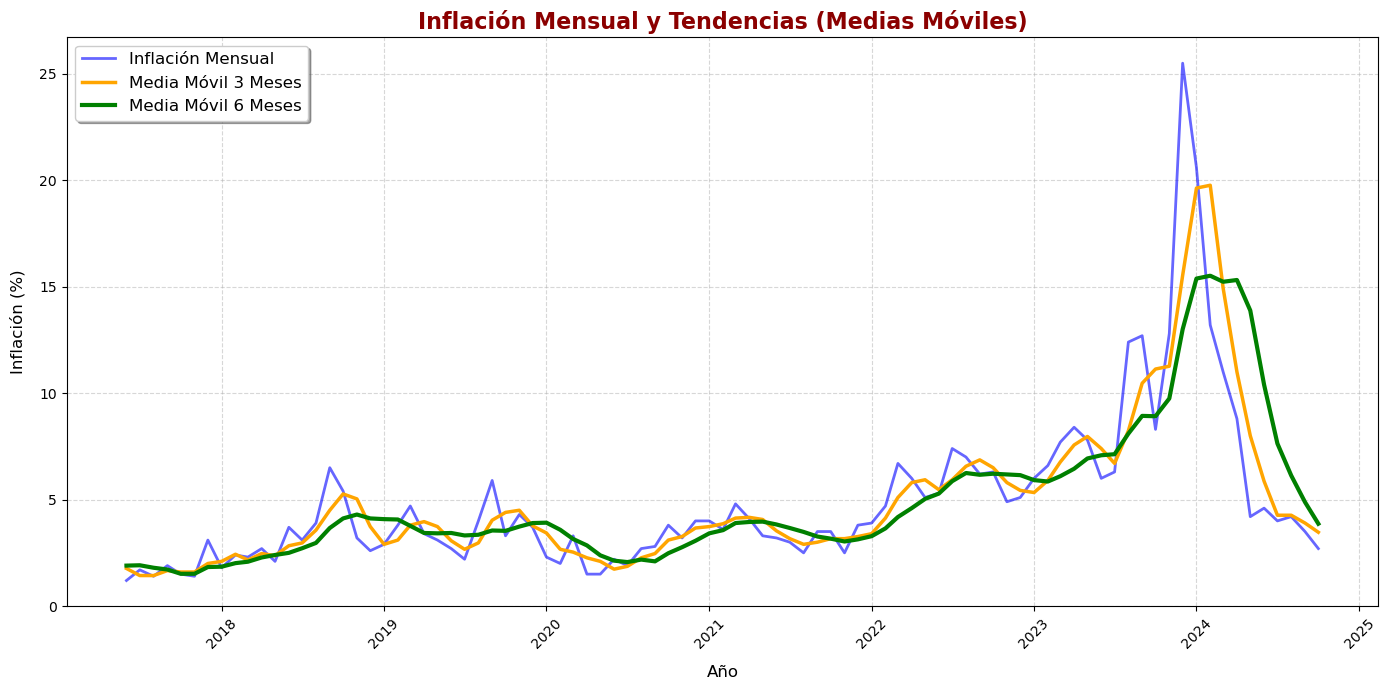

In [41]:
# Gráfico

plt.figure(figsize=(14, 7))
sns.lineplot(x="Fecha", y="Inflacion (%)", data=data, label="Inflación Mensual", color="blue", linewidth=2, alpha=0.6)
sns.lineplot(x="Fecha", y="Media_Movil_3m", data=data, label="Media Móvil 3 Meses", color="orange", linewidth=2.5)
sns.lineplot(x="Fecha", y="Media_Movil_6m", data=data, label="Media Móvil 6 Meses", color="green", linewidth=3)

plt.title("Inflación Mensual y Tendencias (Medias Móviles)", fontsize=16, fontweight="bold", color="darkred")
plt.xlabel("Año", fontsize=12, labelpad=10)
plt.ylabel("Inflación (%)", fontsize=12, labelpad=10)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.legend(fontsize=12, loc="upper left", frameon=True, shadow=True)
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()

plt.show()

# Inflación Promedio Mensual

La inflación promedio mensual se calcula agrupando los datos por mes y obteniendo el promedio de inflación para cada uno. Este análisis permite identificar patrones estacionales en el comportamiento de la inflación a lo largo del año.

El gráfico resultante facilita la visualización de cómo los niveles promedio de inflación varían entre meses, destacando períodos del año con niveles de inflación relativamente altos o bajos. Este enfoque es útil para detectar posibles estacionalidades y comportamientos recurrentes en los datos económicos.

In [42]:
# Comienzo por extraer el mes

data['Mes'] = data['Fecha'].dt.month

# Luego calculo el promedio mensual

promedio_mensual = data.groupby('Mes')['Inflacion (%)'].mean().reset_index()

print("Promedio mensual de inflación:")
print(promedio_mensual)

Promedio mensual de inflación:
    Mes  Inflacion (%)
0     1       5.928571
1     2       5.185714
2     3       5.785714
3     4       4.985714
4     5       3.871429
5     6       3.612500
6     7       3.700000
7     8       4.762500
8     9       5.375000
9    10       4.350000
10   11       4.614286
11   12       6.828571


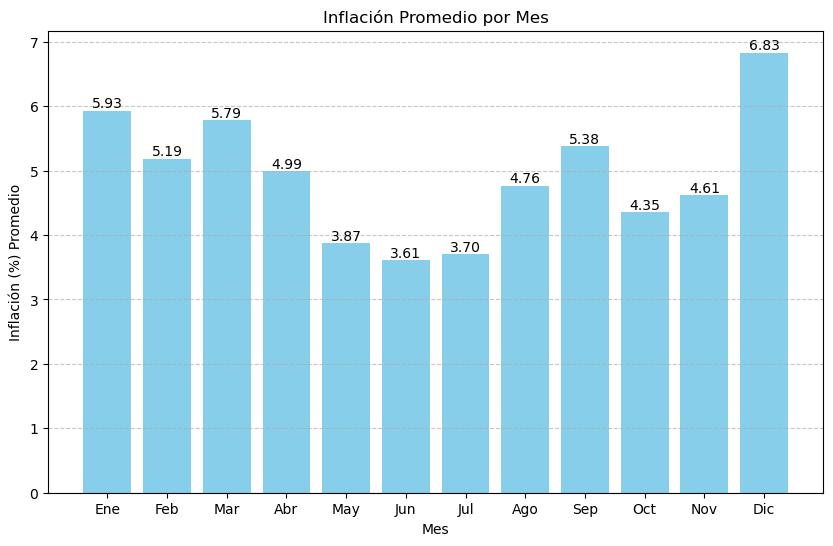

In [43]:
# Gráfico

plt.figure(figsize=(10, 6))
bars = plt.bar(promedio_mensual['Mes'], promedio_mensual['Inflacion (%)'], color='skyblue')

# Agrego valores encima de las barras

for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2, 
        bar.get_height(),                  
        f'{bar.get_height():.2f}',         
        ha='center',                      
        va='bottom',                       
        fontsize=10                       
    )

plt.title('Inflación Promedio por Mes')
plt.xlabel('Mes')
plt.ylabel('Inflación (%) Promedio')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Del análisis realizado, se observa que la inflación promedio mensual se mantuvo por debajo del **5%** en la mayoría de los meses del año. Sin embargo, existen cinco excepciones destacables:

Enero, febrero, marzo, septiembre y diciembre presentan inflaciones **superiores al 5%** en promedio.

**Diciembre** es el mes con la inflación promedio más alta, alcanzando un **6.83%**, lo que sugiere un comportamiento estacional relacionado con factores económicos específicos, como ajustes de precios al cierre del año.

# Análisis de Volatilidad

El análisis de volatilidad mide la inestabilidad en los datos de inflación mediante dos indicadores clave:

Desviación estándar: Evalúa la dispersión de los valores de inflación respecto a su promedio, proporcionando una medida de cuánto varían los datos en general.

Rango intercuartílico (IQR): Representa la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1), mostrando la concentración de los datos centrales y destacando posibles valores extremos.

Este análisis permite identificar patrones de estabilidad o inestabilidad en la inflación, así como rangos típicos donde se concentran la mayoría de los valores.

In [44]:
# Cálculo de desviación estándar

desviacion_estandar = data['Inflacion (%)'].std()

# Cálculo del rango intercuartílico (IQR)

q1 = data['Inflacion (%)'].quantile(0.25)  # Primer cuartil (25%)
q3 = data['Inflacion (%)'].quantile(0.75)  # Tercer cuartil (75%)
iqr = q3 - q1  # Rango intercuartílico

# Resultados

print(f"Desviación estándar de la inflación: {desviacion_estandar:.2f}")
print(f"Primer cuartil (Q1): {q1:.2f}")
print(f"Tercer cuartil (Q3): {q3:.2f}")
print(f"Rango intercuartílico (IQR): {iqr:.2f}")

Desviación estándar de la inflación: 3.85
Primer cuartil (Q1): 2.70
Tercer cuartil (Q3): 6.00
Rango intercuartílico (IQR): 3.30


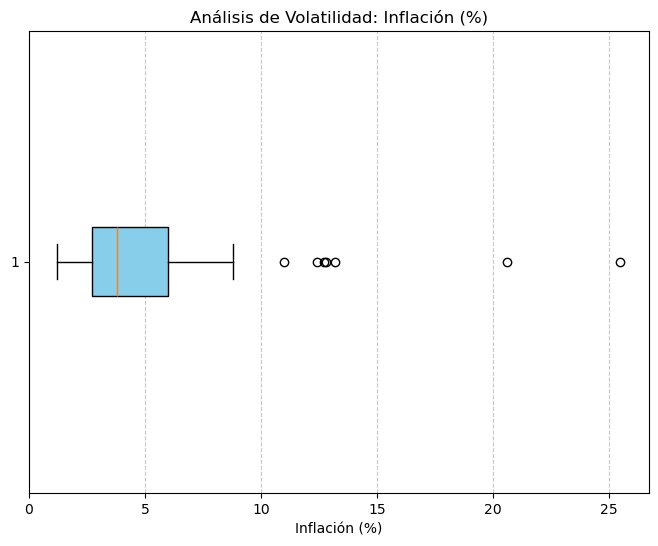

In [45]:
# Gráfico

plt.figure(figsize=(8, 6))
plt.boxplot(data['Inflacion (%)'], vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
plt.title('Análisis de Volatilidad: Inflación (%)')
plt.xlabel('Inflación (%)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

La desviación estándar de la inflación es **3.85%**, lo que refleja una considerable variabilidad en los datos analizados. 

El rango intercuartílico (IQR) es **3.30%**, lo que sugiere que la mayor parte de los valores de inflación se concentran entre **2.70%** (Q1) y **6.00%** (Q3).

Esto indica que, aunque la inflación presenta valores centrales relativamente consistentes, existen fluctuaciones importantes que podrían deberse a factores económicos o estacionales. Este tipo de dispersión resalta la importancia de analizar tanto los valores centrales como los extremos para comprender completamente el comportamiento de la inflación.

### Nota final:

Todo el análisis presentado en este archivo se realizó utilizando datos del **INDEC**, correspondientes al período comprendido entre **enero de 2017** y **octubre de 2024**. Estos resultados reflejan patrones y comportamientos de la inflación en Argentina durante dicho intervalo de tiempo.